In [1]:
import numpy as np
import pandas as pd
from scipy import stats,spatial,sparse
from sklearn import manifold,datasets,neighbors, decomposition
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scanpy as sc
import matplotlib as mpl

In [3]:
def correlation_comparation(list_A,list_B):
    # pearsonr_res = stats.pearsonr(list_A, list_B)
    spearmanr_res = stats.spearmanr(list_A, list_B) 
    tau, p_value = stats.kendalltau(list_A, list_B)
    return spearmanr_res.statistic,tau # pearsonr_res.statistic,
def adjacency_dist_matrix(data,k_neighbors,root_indices):
    
    n_samples = data.shape[0]
    nbrs = neighbors.NearestNeighbors(n_neighbors=k_neighbors, metric='euclidean').fit(data)
    knn_dists, knn_indices = nbrs.kneighbors(data)
        
    indptr = range(0,(n_samples+1)*k_neighbors,k_neighbors)
    k_matrix = sparse.csr_matrix((knn_dists.flatten(),knn_indices.flatten(),indptr),shape=(n_samples,n_samples))
    adjacency_matrix = k_matrix.maximum(k_matrix.T) 
    
    geo_matrix = sparse.csgraph.dijkstra(csgraph=adjacency_matrix, directed=False, indices=root_indices, return_predecessors=False)
    
    return adjacency_matrix,geo_matrix 

In [4]:
paul_adata = sc.datasets.paul15()

In [5]:
filter_result = sc.pp.filter_genes_dispersion(paul_adata.X,flavor='cell_ranger',n_top_genes=1000,log=False)
paul_adata = paul_adata[:, filter_result.gene_subset]
sc.pp.log1p(paul_adata)
paul_X = paul_adata.X

C:\anaconda3\Lib\site-packages\scanpy\preprocessing\_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [6]:
paul_dpt_pseudotime = pd.read_csv('../1_Paul/paul.dpt_pseudotime.csv',index_col=0).values.reshape(-1)
paul_palantir_time = pd.read_csv("../1_Paul/paul.palantir_pseudotime.csv",index_col=0).values.reshape(-1)
paul_monocle_time = pd.read_csv("../1_Paul/paul.monocle_pseudotime.csv",index_col=0).values.reshape(-1)
paul_dtne_time = pd.read_csv("../1_Paul/paul.dtne_pseudotime.csv",index_col=0).values.reshape(-1)

In [7]:
paul_adj,paul_geo = adjacency_dist_matrix(paul_X,20,840)

In [8]:
nest_dpt_pseudotime = pd.read_csv('../1_nestorowa/nest.dpt_pseudotime.csv',index_col=0).values.reshape(-1)
nest_palantir_time = pd.read_csv("../1_nestorowa/nest.palantir_pseudotime.csv",index_col=0).values.reshape(-1)
nest_monocle_time = pd.read_csv("../1_nestorowa/nest.monocle_pseudotime.csv",index_col=0).values.reshape(-1)
nest_dtne_time = pd.read_csv("../1_nestorowa/nest.dtne_pseudotime.csv",index_col=0).values.reshape(-1)

In [9]:
nest_adata = sc.read_h5ad('../1_nestorowa/nestorowa.data2.h5ad')
nest_X_pca = nest_adata.obsm['X_pca']

In [10]:
nest_adj,nest_geo = adjacency_dist_matrix(nest_X_pca,20,657)

In [11]:
pan_dpt_pseudotime = pd.read_csv('../1_pancreas/pan.dpt_pseudotime.csv',index_col=0).values.reshape(-1)
pan_palantir_time = pd.read_csv("../1_pancreas/pan.palantir_pseudotime.csv",index_col=0).values.reshape(-1)
pan_monocle_time = pd.read_csv("../1_pancreas/pan.monocle_pseudotime.csv",index_col=0).values.reshape(-1)
pan_dtne_time = pd.read_csv("../1_pancreas/pan.dtne_pseudotime.csv",index_col=0).values.reshape(-1)

In [12]:
pan_adata = sc.read_h5ad('../1_pancreas/endocrinogenesis.h5ad')
pan_X_pca  = pan_adata.obsm['X_pca']

In [13]:
pan_adj,pan_geo = adjacency_dist_matrix(pan_X_pca,20,2208)

In [14]:
lymphoid_dpt_pseudotime = pd.read_csv('../1_lymphoid/lymphoid.dpt_pseudotime.csv',index_col=0).values.reshape(-1)
lymphoid_palantir_time = pd.read_csv("../1_lymphoid/lymphoid.palantir_pseudotime.csv",index_col=0).values.reshape(-1)
lymphoid_monocle_time = pd.read_csv("../1_lymphoid/lymphoid.monocle_pseudotime.csv",index_col=0).values.reshape(-1)
lymphoid_dtne_time = pd.read_csv("../1_lymphoid/lymphoid.dtne_pseudotime.csv",index_col=0).values.reshape(-1)

In [15]:
lymphoid_lsi = pd.read_csv("../1_lymphoid/lymphoid_lsi.csv", sep=",",index_col=0)
# the first LSI dimension is highly correlated with sequencing depth in that case, as sometimes happens with scATAC-seq data. 
# For this reason we discard the first component for downstream analysis.
lymphoid_lsi2 = lymphoid_lsi.iloc[:,1:50]

In [16]:
lymphoid_adj,lymphoid_geo = adjacency_dist_matrix(lymphoid_lsi2,30,3047)

In [17]:
eb_dpt_pseudotime = pd.read_csv("../1_EB/eb.dpt_pseudotime.csv",index_col=0).values.reshape(-1)
eb_palantir_time = pd.read_csv("../1_EB/eb.palantir_pseudotime.csv",index_col=0).values.reshape(-1)
eb_monocle_time = pd.read_csv("../1_EB/eb.monocle_pseudotime.csv",index_col=0).values.reshape(-1)
eb_dtne_time = pd.read_csv("../1_EB/eb.dtne_pseudotime.csv",index_col=0).values.reshape(-1)

In [18]:
EBT_counts = sc.read_h5ad('../1_EB/EBT_counts_sqrt.h5ad')
eb_X = EBT_counts.X

In [19]:
eb_adj,eb_geo = adjacency_dist_matrix(eb_X,4,1257)

In [20]:
rc_consensus_time = pd.read_csv("../1_COPILOT/rc.integrated.consensus.time.csv",index_col=0).values.reshape(-1)
rc_dpt_pseudotime = pd.read_csv('../1_COPILOT/rc.integrated.dpt_pseudotime.csv',index_col=0).values.reshape(-1)
rc_palantir_time = pd.read_csv("../1_COPILOT/rc.integrated.palantir_pseudotime.csv",index_col=0).values.reshape(-1)
rc_monocle_time = pd.read_csv("../1_COPILOT/rc.integrated.monocle_pseudotime.csv",index_col=0).values.reshape(-1)
rc_dtne_time = pd.read_csv("../1_COPILOT/rc.integrated.dtne_pseudotime.csv",index_col=0).values.reshape(-1)

In [21]:
paul_geo = paul_geo/max(paul_geo)
nest_geo = nest_geo/max(nest_geo)
pan_geo = pan_geo/max(pan_geo)
lymphoid_geo = lymphoid_geo/max(lymphoid_geo)
eb_geo = eb_geo/max(eb_geo)

In [22]:
import matplotlib.gridspec as gridspec

In [23]:
cmap = 'Spectral'
x = np.linspace(0, 1, 100)
y = x

In [24]:
names = ['DPT','Palantir','Monocle3','DTNE']
paul_pseudotime = [paul_geo,paul_dpt_pseudotime,paul_palantir_time,paul_monocle_time,paul_dtne_time]
nest_pseudotime = [nest_geo,nest_dpt_pseudotime,nest_palantir_time,nest_monocle_time,nest_dtne_time]
pan_pseudotime  = [pan_geo,pan_dpt_pseudotime,pan_palantir_time,pan_monocle_time,pan_dtne_time]
lymphoid_time   = [lymphoid_geo,lymphoid_dpt_pseudotime,lymphoid_palantir_time,lymphoid_monocle_time,lymphoid_dtne_time]
eb_pseudotime   = [eb_geo, eb_dpt_pseudotime,eb_palantir_time,eb_monocle_time,eb_dtne_time]
rc_pseudotime   = [rc_consensus_time,rc_dpt_pseudotime,rc_palantir_time,rc_monocle_time,rc_dtne_time] 

data_pseudotime = [paul_pseudotime, nest_pseudotime, pan_pseudotime, lymphoid_time, eb_pseudotime, rc_pseudotime]

In [25]:
data_pseudotime[0][0]

array([0.16346974, 0.48330879, 0.67994987, ..., 0.16921715, 0.50449239,
       0.77975004])

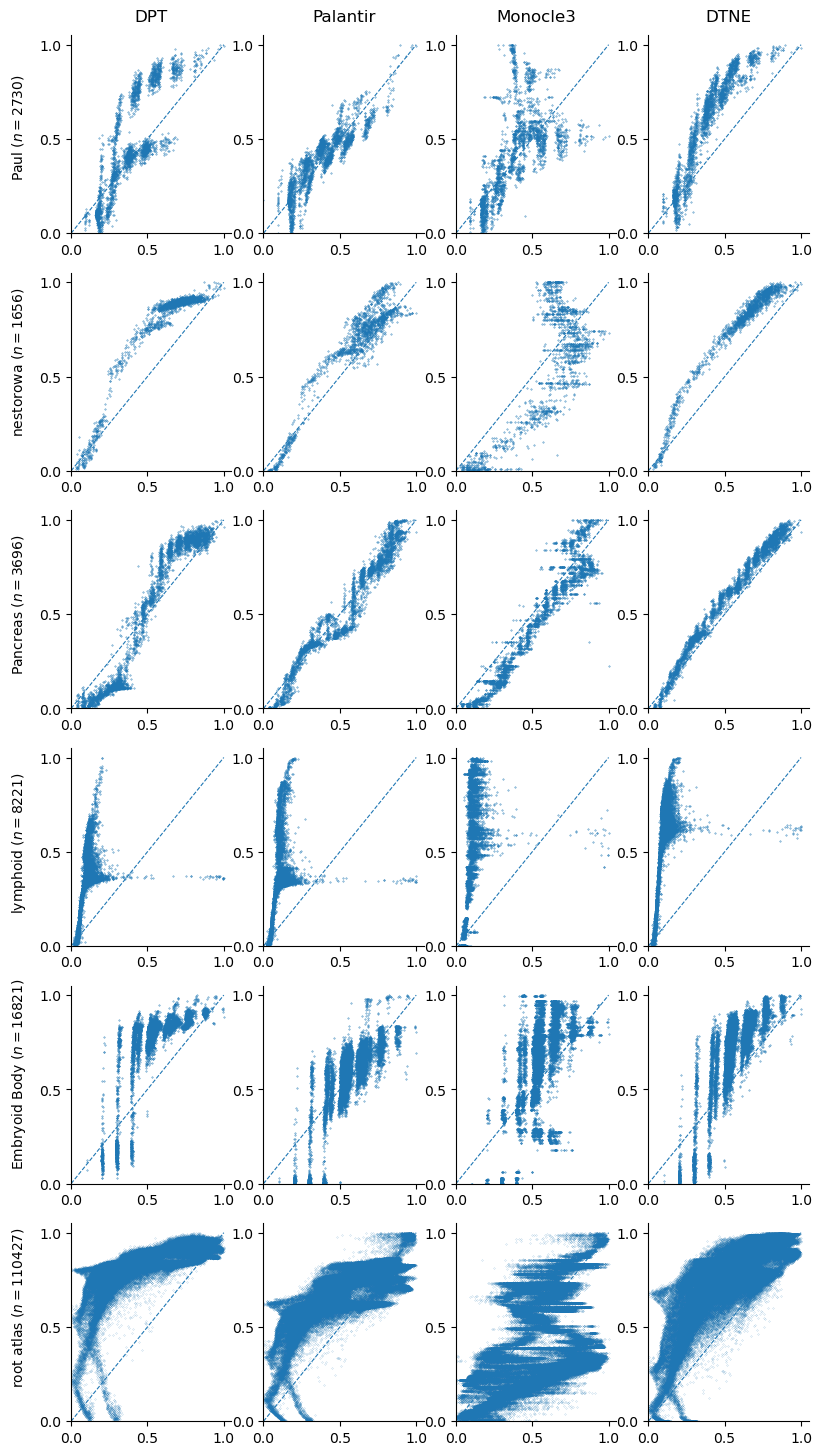

In [28]:
fig = plt.figure(figsize=(12, 18))
grids = plt.GridSpec(6, 5)

for i in range(6):
    for j in range(4):
        ax = fig.add_subplot(grids[i,j])
        for side in ['right','top']:
            ax.spines[side].set_visible(False) 
        ax.plot(x, y,linestyle='--',c='tab:blue',lw=.8)
        ax.set_xlim(0, 1.05)
        ax.set_ylim(0, 1.05)
        ax.set_yticks([0,0.5,1])
        if i < 5:
            ax.scatter(data_pseudotime[i][0],data_pseudotime[i][j+1],s=0.1) 
        else:
            ax.scatter(data_pseudotime[i][0],data_pseudotime[i][j+1],s=0.01) 
        if i == 0:
            ax.set_title(names[j],size=12,pad=10)
        if j == 0:
            if i == 0:
                ax.text(-0.4, 0.3, 'Paul ($n=2730$)',rotation='vertical',fontsize=10)
            if i == 1:
                ax.text(-0.4, 0.2, 'nestorowa ($n=1656$)',rotation='vertical',fontsize=10)
            if i == 2:
                ax.text(-0.4, 0.2, 'Pancreas ($n=3696$)',rotation='vertical',fontsize=10)
            if i == 3:
                ax.text(-0.4, 0.2, 'lymphoid ($n=8221$)',rotation='vertical',fontsize=10)
            if i == 4:
                ax.text(-0.4, 0.1, 'Embryoid Body ($n=16821$)',rotation='vertical',fontsize=10)
            if i == 5:
                ax.text(-0.4, 0.2, 'root atlas ($n=110427$)',rotation='vertical',fontsize=10)

# plt.savefig('./sc_correlation_plot.png', format='png', bbox_inches='tight', dpi=500)
# plt.savefig('./sc_correlation_plot.pdf', format='pdf', bbox_inches='tight',dpi=500)

In [60]:
fig = plt.figure(figsize=(18, 12))
grids = plt.GridSpec(4, 6)

for i in range(6):
    for j in range(4):
        ax = fig.add_subplot(grids[j,i])
        for side in ['right','top']:
            ax.spines[side].set_visible(False) 
        ax.plot(x, y,linestyle='--',c='tab:blue',lw=.8)
        ax.set_xlim(0, 1.05)
        ax.set_ylim(0, 1.05)
        ax.set_yticks([0,0.5,1])
        if i < 5:
            s = ax.scatter(data_pseudotime[i][0],data_pseudotime[i][j+1],s=0.1) 
        else:
            s = ax.scatter(data_pseudotime[i][0],data_pseudotime[i][j+1],s=0.01) 
        s.set_rasterized(True)
        if i == 0:
            ax.text(-0.4, 0.3, names[j],size=12,rotation='vertical',)
        if j == 0:
            if i == 0:
                ax.text( 0.3, 1.2, 'Paul ($n=2730$)',fontsize=10)
            if i == 1:
                ax.text( 0.25, 1.2, 'nestorowa ($n=1656$)',fontsize=10)
            if i == 2:
                ax.text( 0.3, 1.2, 'Pancreas ($n=3696$)',fontsize=10)
            if i == 3:
                ax.text( 0.25, 1.2, 'lymphoid ($n=8221$)',fontsize=10)
            if i == 4:
                ax.text( 0.2, 1.2, 'Embryoid Body ($n=16821$)',fontsize=10)
            if i == 5:
                ax.text( 0.25, 1.2, 'root atlas ($n=110427$)',fontsize=10)

plt.savefig('./sc_correlation_plot.png', format='png', bbox_inches='tight', dpi=500)
plt.savefig('./sc_correlation_plot.pdf', format='pdf', bbox_inches='tight', dpi=500)
fig.savefig('./sc_correlation_plot.eps', format='eps', bbox_inches='tight', dpi=1000)